<a href="https://colab.research.google.com/github/syauqidamario/dqlab/blob/main/Data_Visualization_with_Python_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pengenalan dataset
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n'% dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


**Penjelasan Dataset**
order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa

1.   produk, tetapi hanya dilakukan oleh 1 customer
2.   order_date : tanggal terjadinya transaksi
3. customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
4. city : kota tempat toko terjadinya transaksi
5. province : provinsi (berdasarkan city)
6. product_id : ID dari suatu product yang dibeli
7. brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama.
8. quantity : Kuantitas/banyaknya product yang dibeli
9. item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli


In [ ]:
# Penambahan kolom order pada dataset
import pandas as pd
import datetime

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


In [ ]:
# Penambahan kolom GMV pada dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

dataset['gmv'] = dataset['item_price'] * dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


In [ ]:
# Membuat data agregat
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


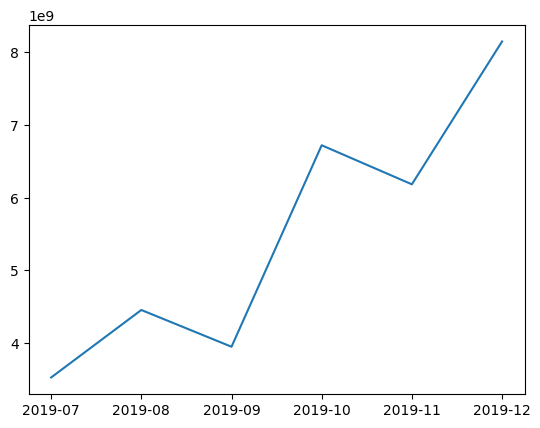

In [ ]:
# Plot pertama dengan Matplotlib
import matplotlib.pyplot as plt
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

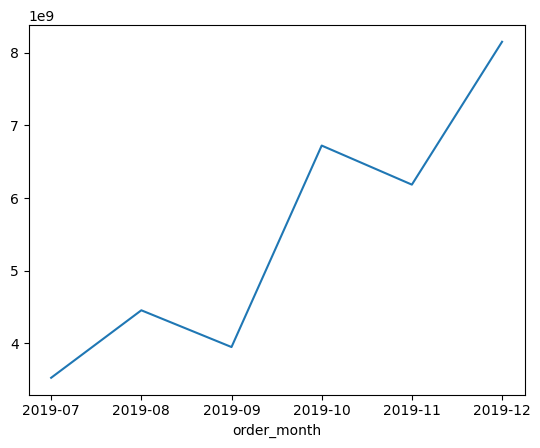

In [ ]:
# Menggunakan fungsi .plot()
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

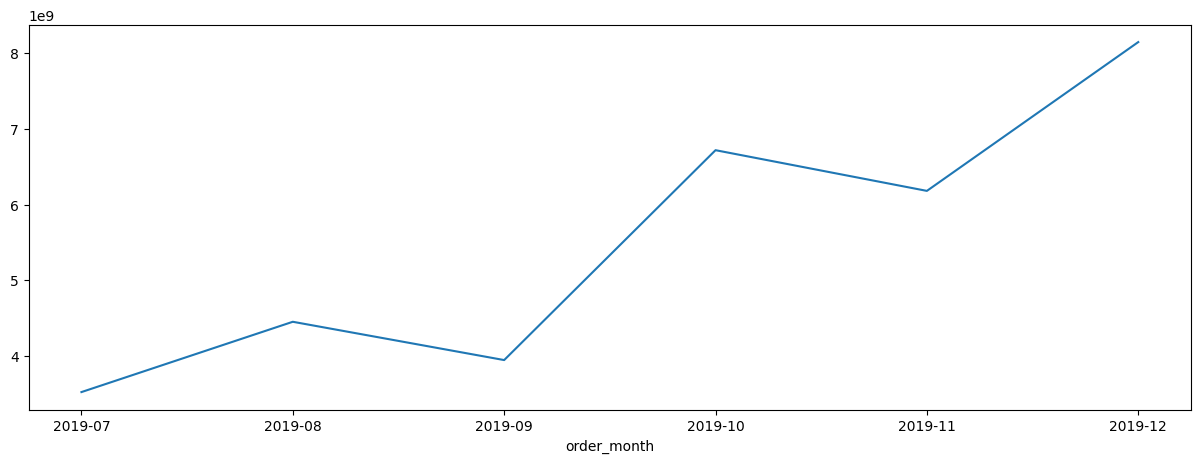

In [ ]:
# Membuat kustomisasi grafik - mengubah figure size
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

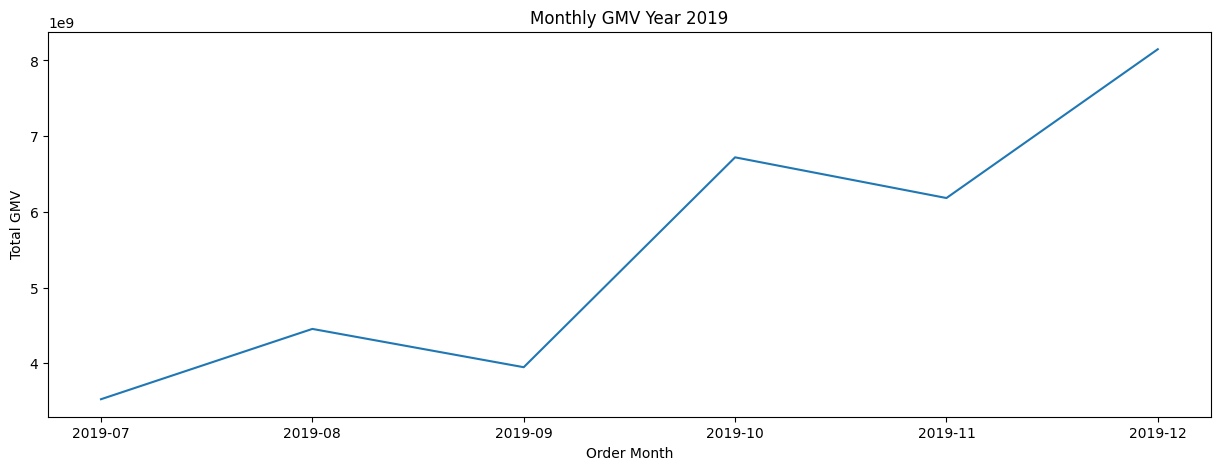

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

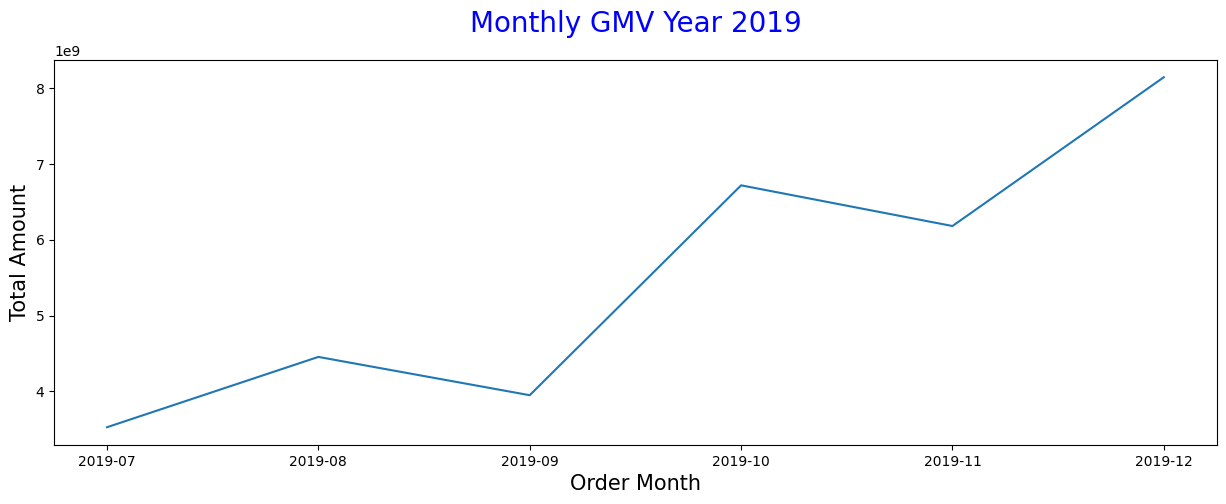

In [ ]:
# Kustomisasi Title & Axis Label
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

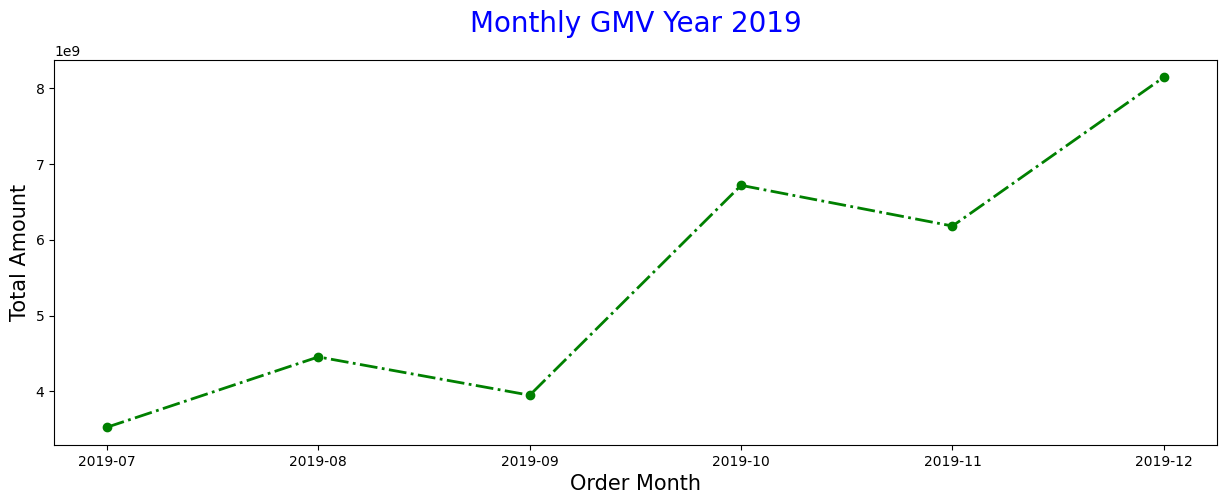

In [ ]:
# Kustomisasi Line & Point
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

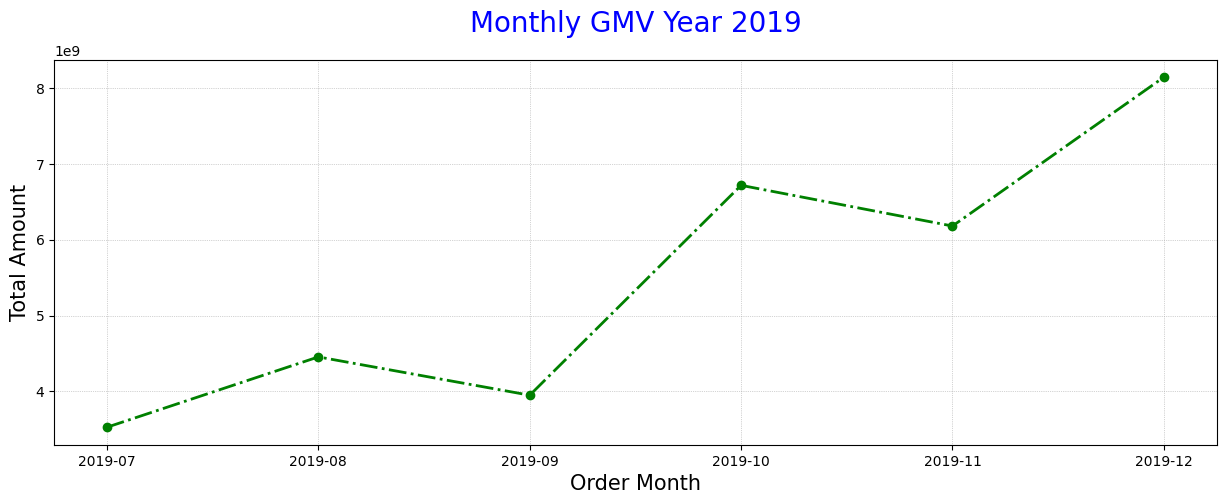

In [ ]:
# Kustomisasi Grid - kustomisasi grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan grid.
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2

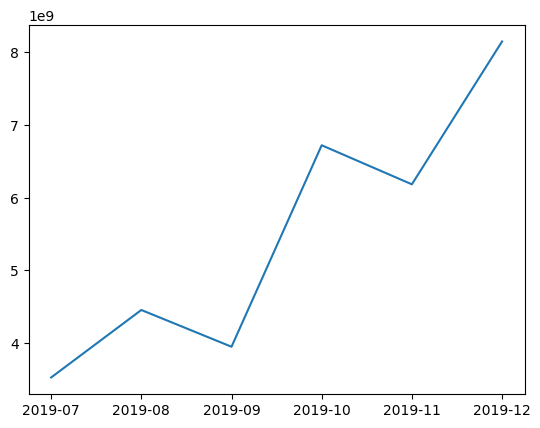

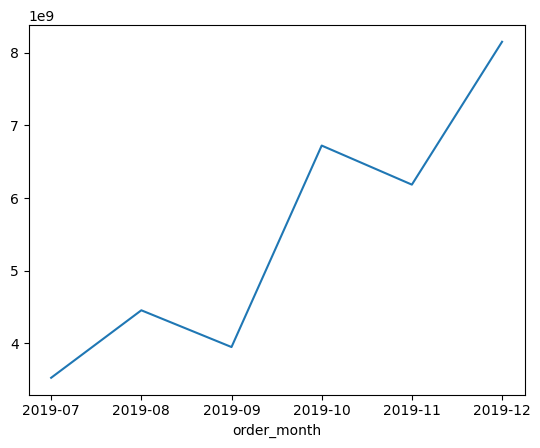

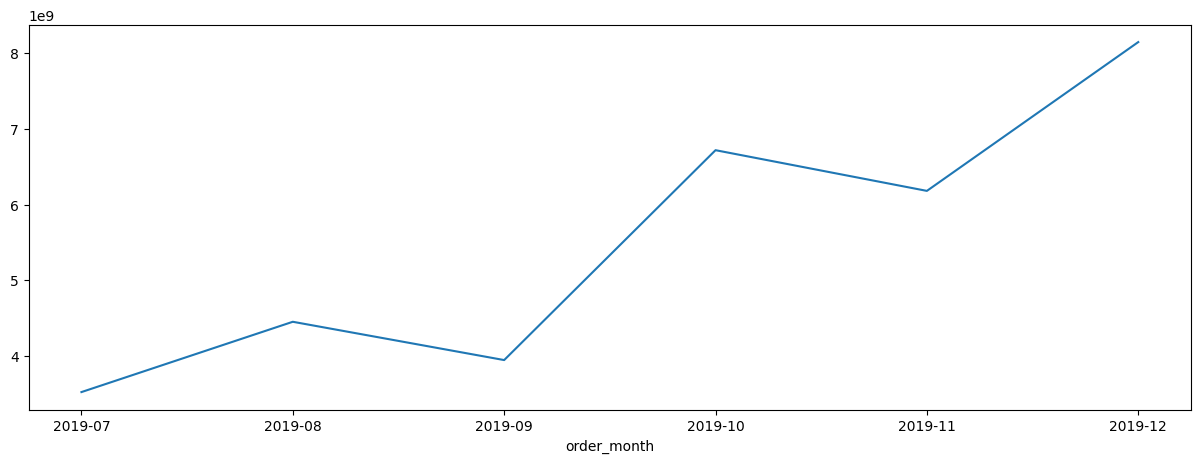

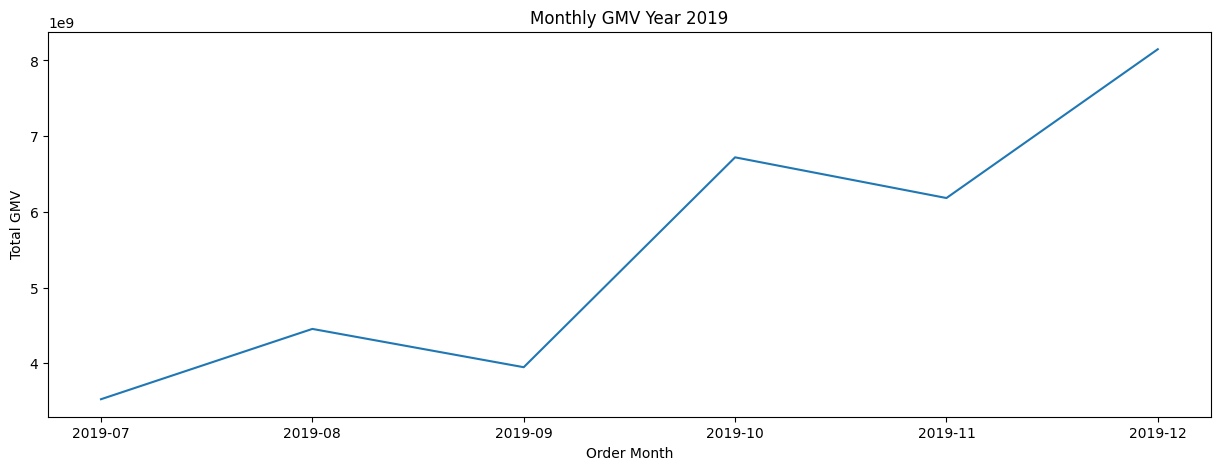

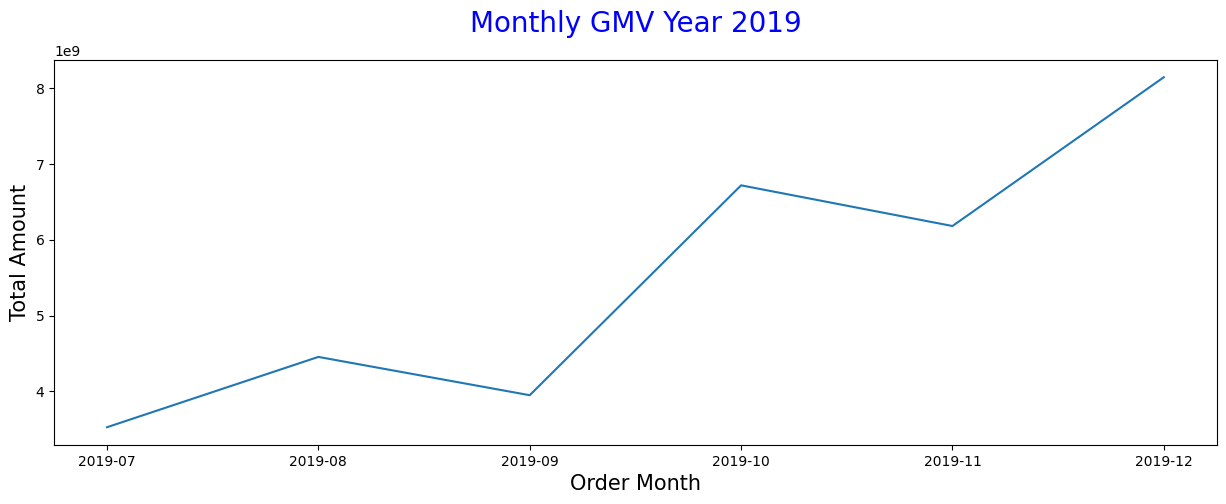

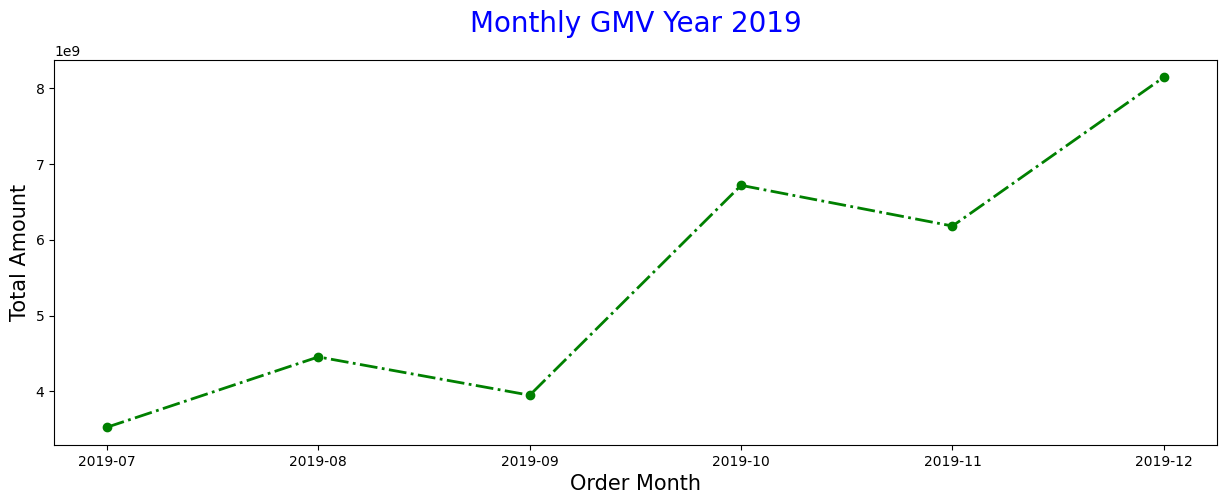

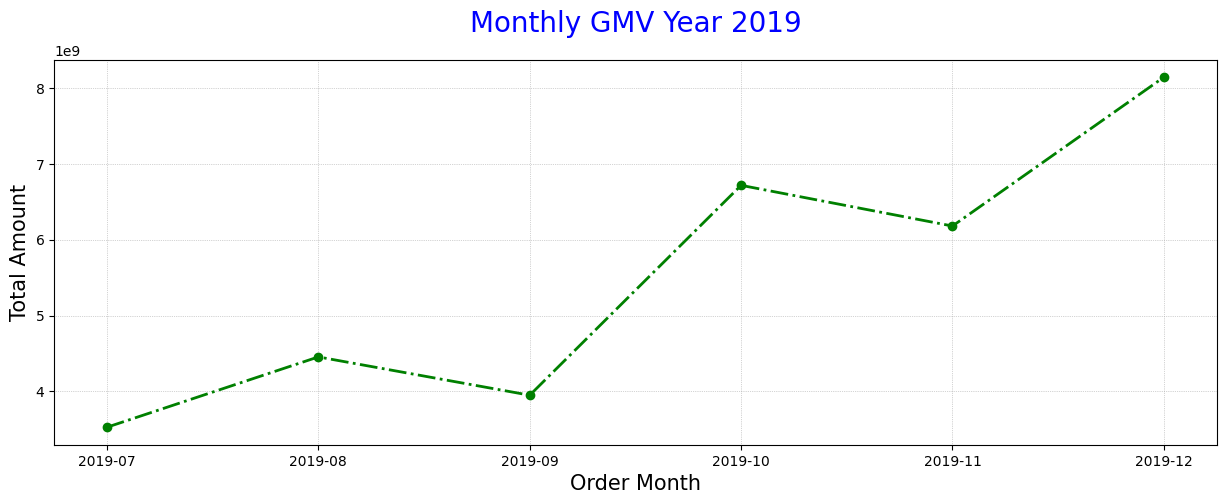

In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# Pengenalan dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n'% dataset.shape)
print('Lima data teratas:')
print(dataset.head())
# **Penjelasan Dataset**
# order_id : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa
#
# 1.   produk, tetapi hanya dilakukan oleh 1 customer
# 2.   order_date : tanggal terjadinya transaksi
# 3. customer_id : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
# 4. city : kota tempat toko terjadinya transaksi
# 5. province : provinsi (berdasarkan city)
# 6. product_id : ID dari suatu product yang dibeli
# 7. brand : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama.
# 8. quantity : Kuantitas/banyaknya product yang dibeli
# 9. item_price : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli
#
# Penambahan kolom order pada dataset

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')

dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(dataset.head())
# Penambahan kolom GMV pada dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

dataset['gmv'] = dataset['item_price'] * dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())
# Membuat data agregat
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)
# Plot pertama dengan Matplotlib
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()
# Menggunakan fungsi .plot()
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()
# Membuat kustomisasi grafik - mengubah figure size

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()
# Kustomisasi Title & Axis Label
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()
# Kustomisasi Line & Point
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()
# Kustomisasi Grid - kustomisasi grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan grid.
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.show()

<Figure size 1500x500 with 0 Axes>

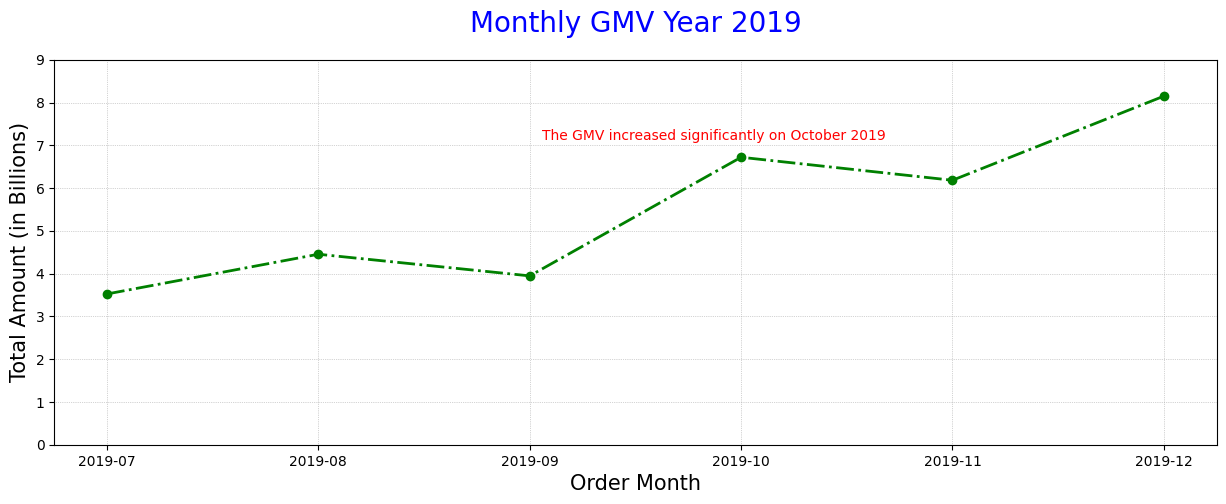

In [ ]:
#Kustomisasi Axis Ticks

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

plt.figure(figsize=(15, 5))
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0) # menentukan batas minimum dan maksimum axis ticks
labels, locations = plt.yticks()
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red') # menambahkan informasi pada plot
plt.yticks(labels, (labels/1000000000).astype(int))
plt.savefig('monthly_gmv.png') # menyimpan hasil plot menjadi file gambar
# Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:

# dpi: Resolusi gambar (dots per inch).
# quality: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
# facecolor: Memberikan warna bagian depan figure, di luar area plot
# edgecolor: Memberikan warna pinggiran gambar
# transparent: Jika nilainya True, maka gambarnya jadi transparan (jika file-nya png)
plt.show()

**Studi Kasus**

Dengan menggunakan dataset yang sama ('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.

Beberapa spesifikasi yang harus diperhatikan:

- Ukuran figure adalah 10x5
- Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019
- Sumbu-y adalah jumlah unique customers di tiap tanggal
- Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri


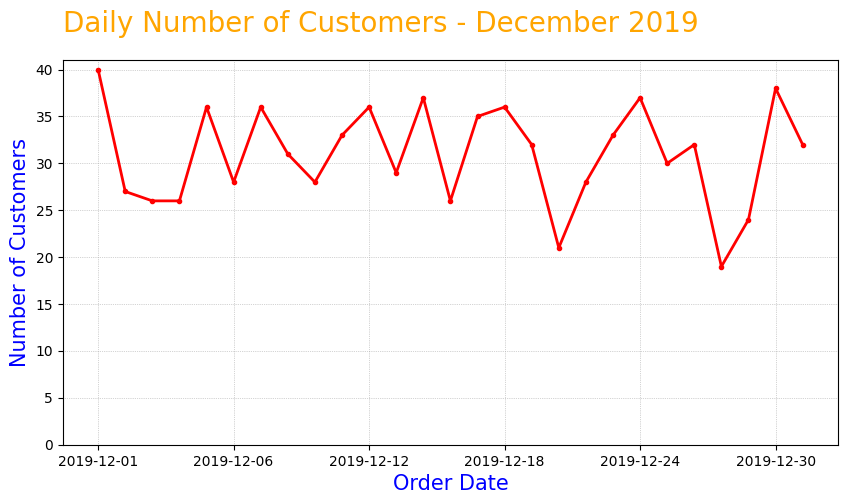

In [ ]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=20, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()

Visualisasi menggunakan Matplotlib - Part 2

In [ ]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

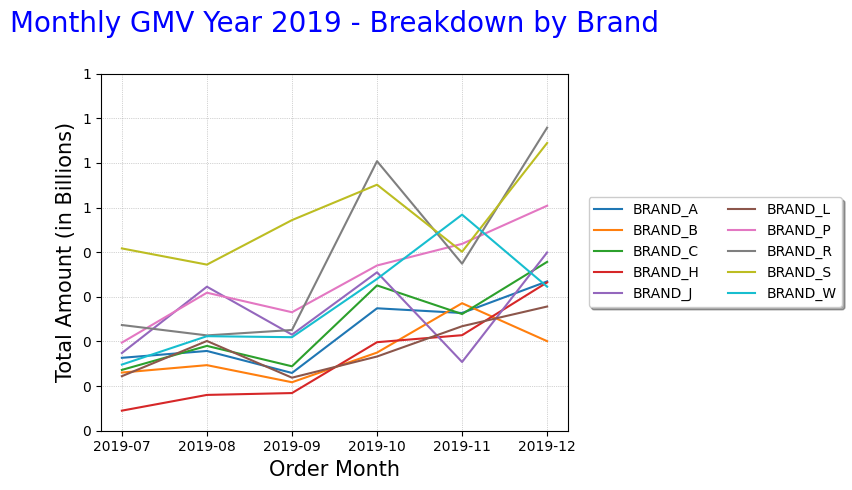

In [ ]:
# Buat Multi-Line Chart
dataset.groupby(['order_month', 'brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels,(labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2) # kustomisasi legend
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

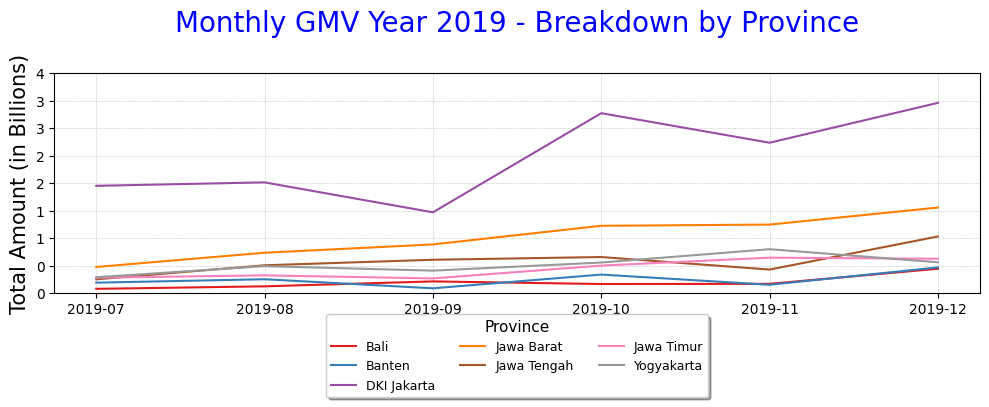

In [ ]:
# Dengan kustomisasi color map
plt.clf()
dataset.groupby(['order_month', 'province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

In [ ]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
# Membuat Line Chart GMV Breakdown by Top Provinces
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


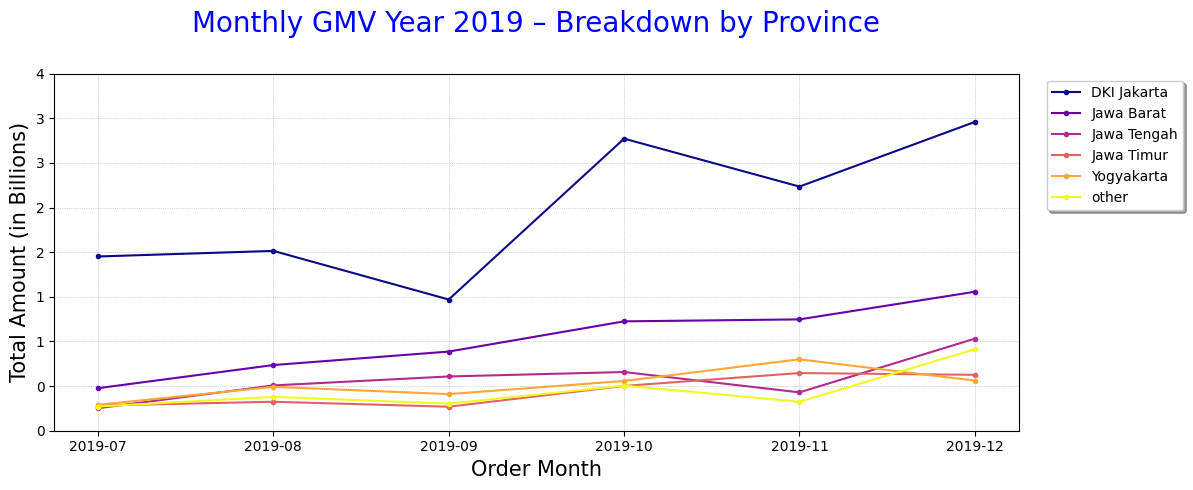

In [ ]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv', ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].tolist()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 – Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

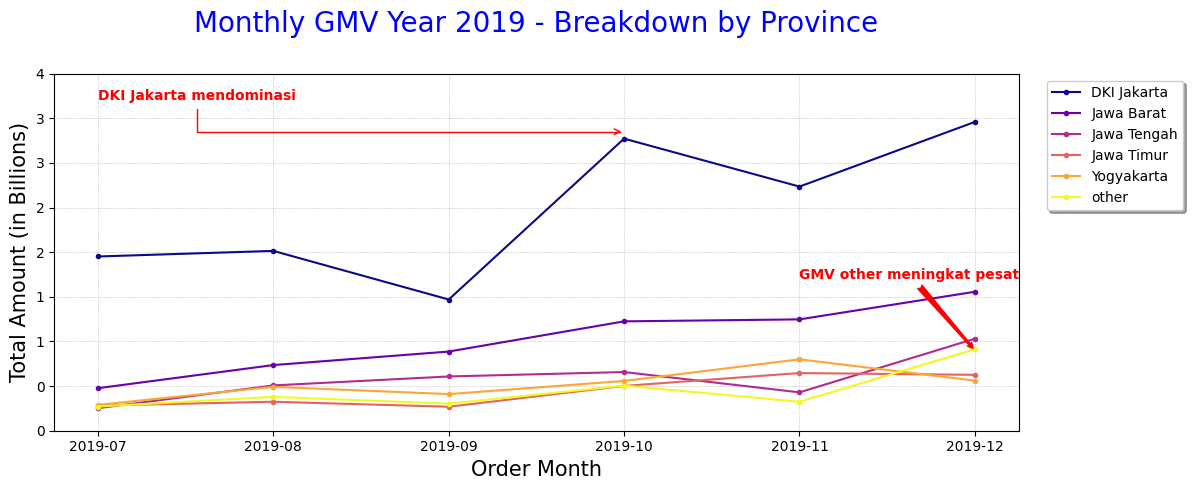

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000),
			xytext=(4, 1700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='fancy',
						  connectionstyle='arc3',
						  color='red'))


# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
			xytext=(0,3700000000), weight='bold', color='red',
			arrowprops=dict(arrowstyle='->', connectionstyle='angle',
						 color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

In [ ]:
# Membuat subset data
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']

dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
4  BRAND_R         2     4475000     2019-10  8950000  
6  BRAND_C         1     1465000     2019-11  1465000  


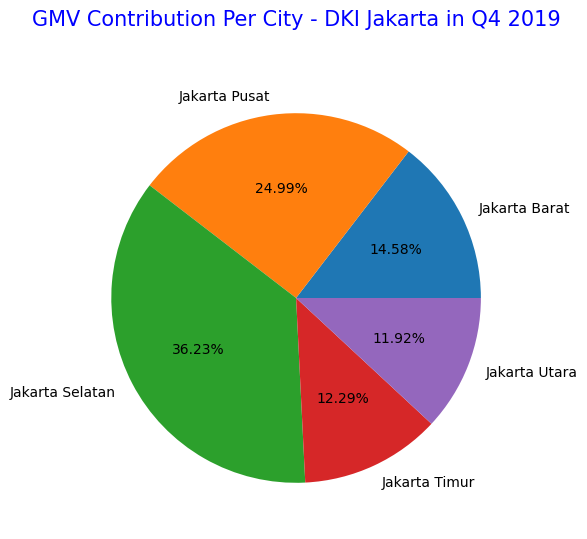

In [ ]:
# Pie chart
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels=gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

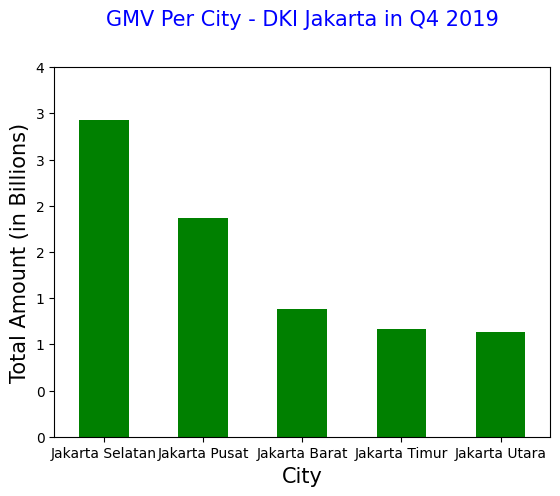

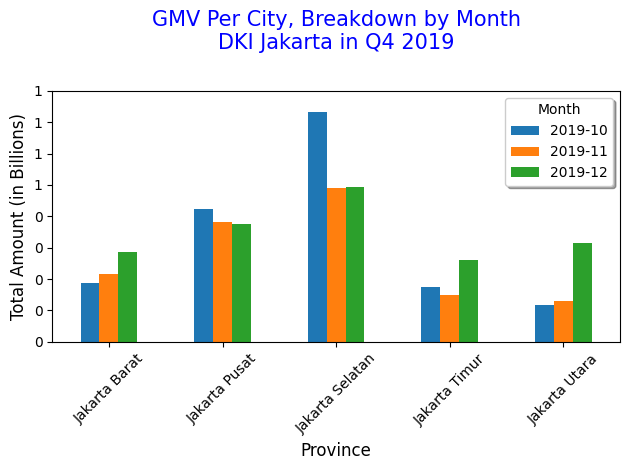

In [ ]:
# Membuat bar chart & multi bar chart
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

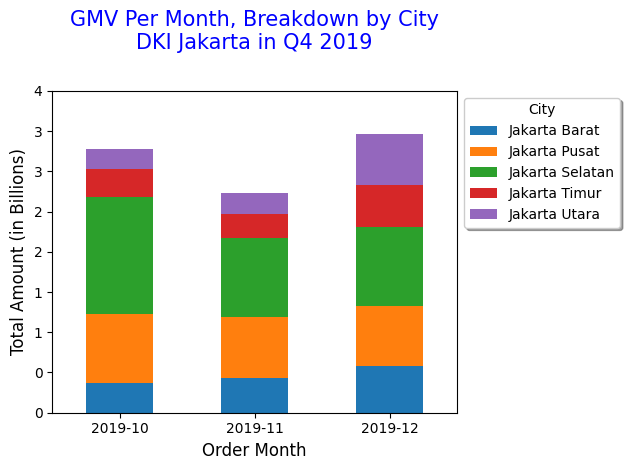

In [ ]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)',fontsize = 12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Membuat agregat data
data_per_customer = (dataset_dki_q4.groupby('customer_id').agg({
	'order_id':'nunique',
	'quantity':'sum',
	'gmv':'sum'}).reset_index().rename(columns={'order_id':'orders'})
)
print(data_per_customer.sort_values(by='orders',ascending=False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
462        16549       8        29   22714000
25         13089       8       166   93554000
..           ...     ...       ...        ...
692        18123       1         3    2220000
19         13028       1        34   10976000
16         12989       1         6     678000
15         12987       1         6    4482000
14         12971       1        24   14160000

[711 rows x 4 columns]


<Figure size 640x480 with 0 Axes>

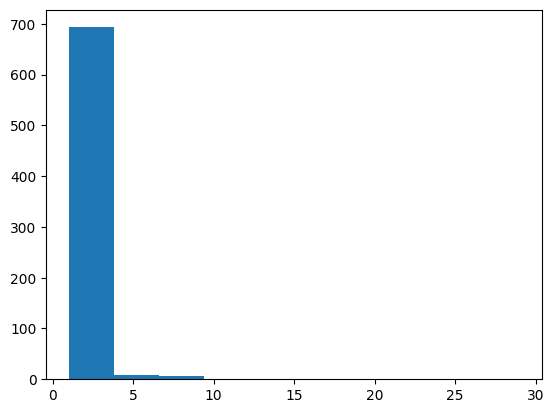

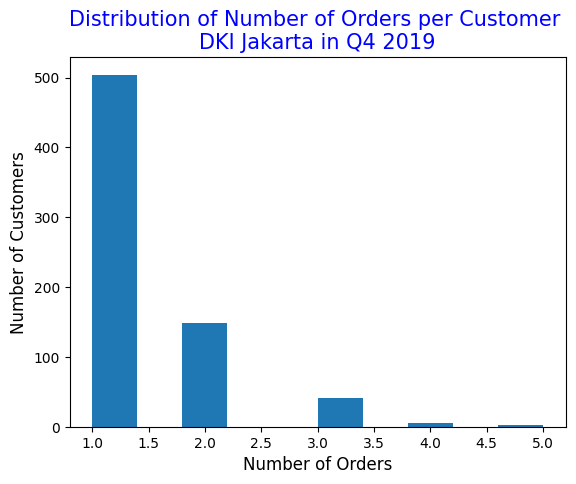

In [ ]:
# Membuat histogram
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer \nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

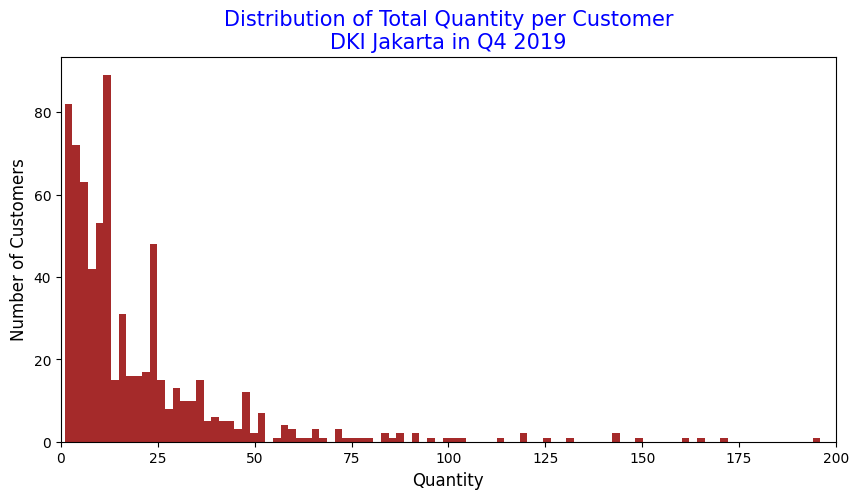

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xlim(xmin=0, xmax=200)
plt.show()

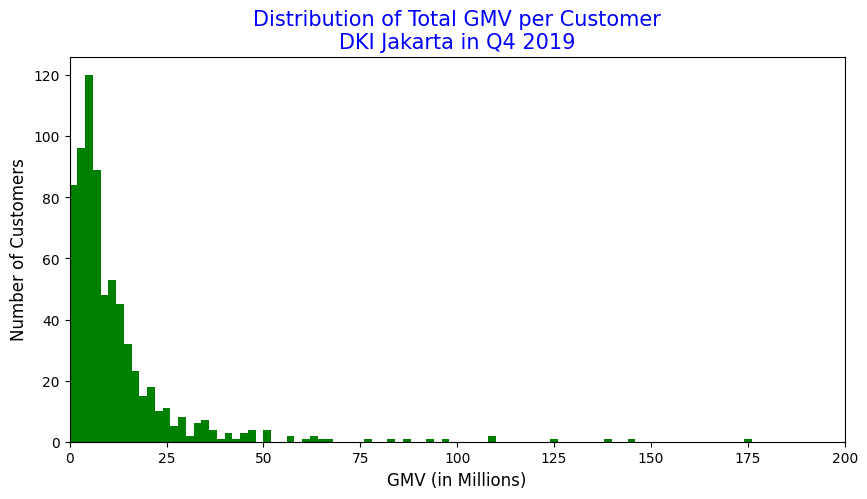

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)
plt.xlim(xmin=0,xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

<Figure size 640x480 with 0 Axes>

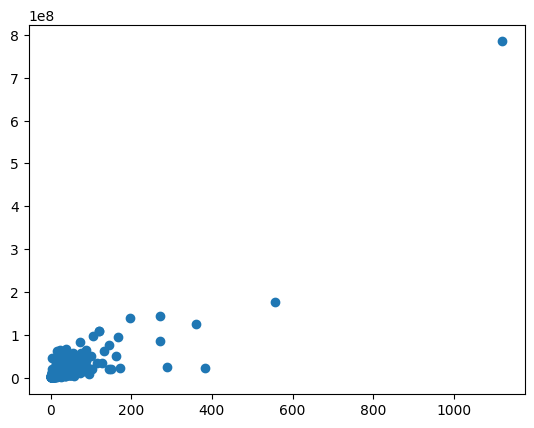

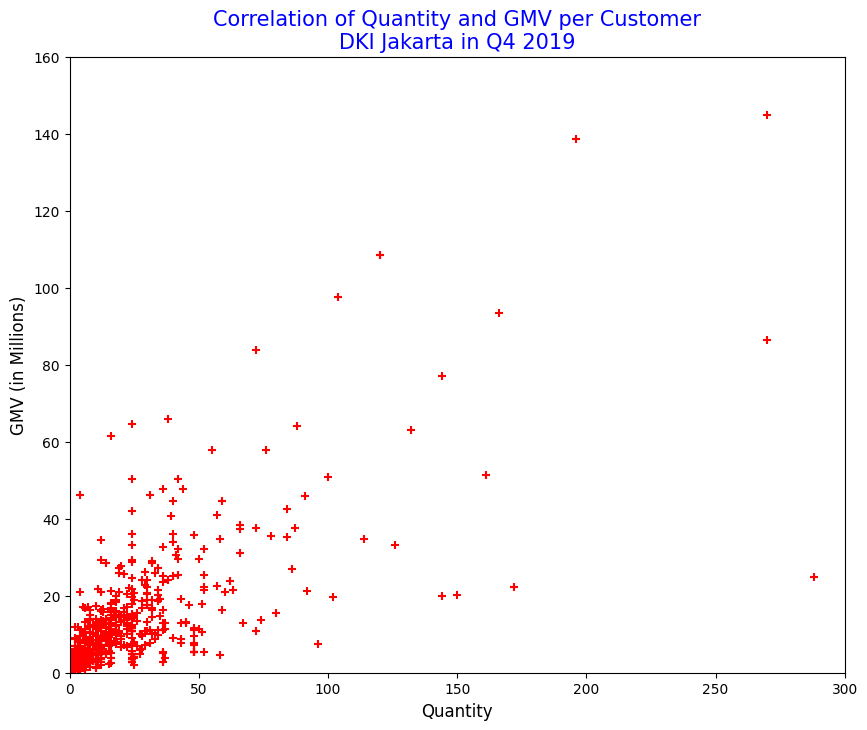

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load dan olah data
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
dataset_dki_q4 = dataset[(dataset['province'] == 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')]

# Agregasi per customer
data_per_customer = (dataset_dki_q4.groupby('customer_id')
                     .agg({'order_id': 'nunique',
                           'quantity': 'sum',
                           'gmv': 'sum'})
                     .reset_index()
                     .rename(columns={'order_id': 'orders'}))

plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'],data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

**Studi Kasus**

Buat variabel baru (e.g. dataset_top5brand_dec) yang berisi data penjualan bulan Desember 2019, hanya untuk top 5 brand dengan quantity terjual terbanyak selama bulan Desember 2019. Sebutkan top 5 brands tersebut! Untuk visualisasi-visualisasi selanjutnya, hanya gunakan dataframe ini. Kemudian, buat visualisasi multi-line chart untuk daily quantity terjualnya, breakdown per brand. Maka, akan terlihat 1 tanggal di mana ada salah satu brand yang mengalami lonjakan (quantity lebih tinggi dari tanggal-tanggal lain). Beri anotasi untuk titik lonjakan tersebut.

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# mengambil informasi top 5 brands berdasarkan quantity
top_brands = (dataset[dataset['order_month'] == '2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity', ascending=False)
                .head(5))

# membuat dataframe baru, filter hanya di bulan Desember 2019 dan hanya top 5 brands
dataset_top5brand_dec = dataset[(dataset['order_month'] == '2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# print top brands
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


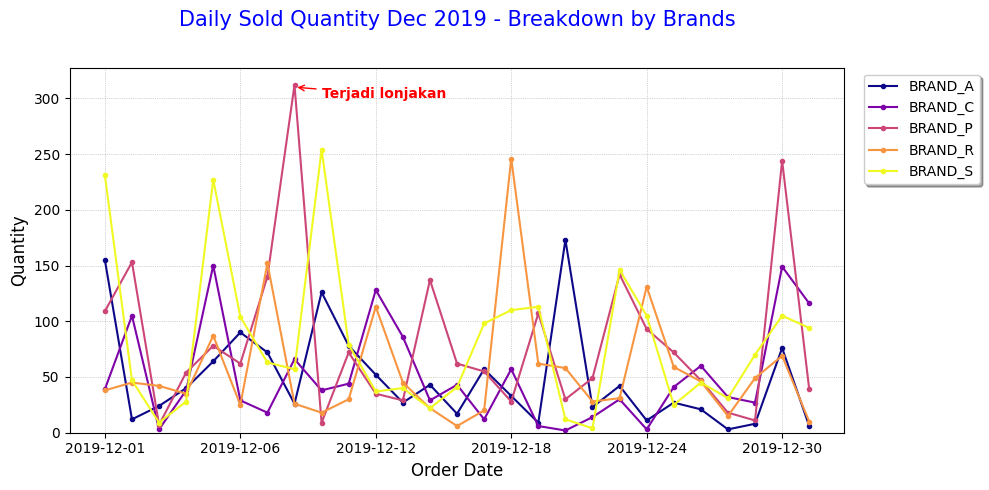

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

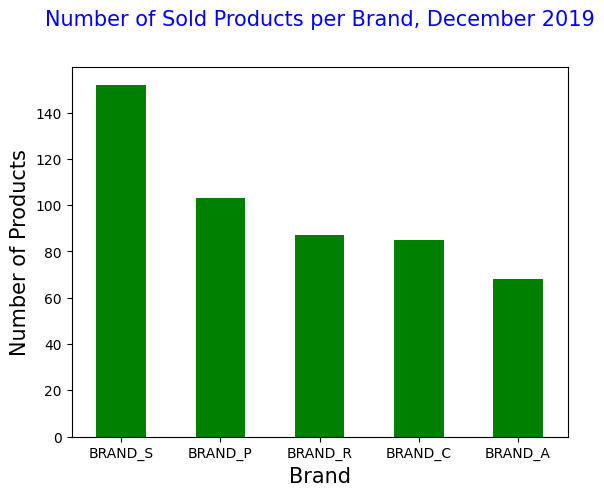

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load dan preprocessing data
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Ambil top 5 brands berdasarkan quantity di Desember 2019
top_brands = (dataset[dataset['order_month'] == '2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity', ascending=False)
                .head(5))

# Filter dataset hanya untuk top 5 brands di Desember 2019
dataset_top5brand_dec = dataset[(dataset['order_month'] == '2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

# Visualisasi jumlah produk unik yang terjual per brand
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Products per Brand, December 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize=15)
plt.ylabel('Number of Products', fontsize=15)  # Sudah diperbaiki
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

**Case 4**

Gunakan stacked chart, untuk breakdown barchart yang di Case 3, antara product yang terjual >= 100 dan < 100 di bulan Desember 2019. Apakah ada pola yang menarik?

Case 3: Cari tahu jumlah product untuk masing-masing brand yang laku selama bulan Desember 2019. Gunakan barchart untuk visualisasinya, urutkan dengan yang kiri adalah brand dengan product lebih banyak.

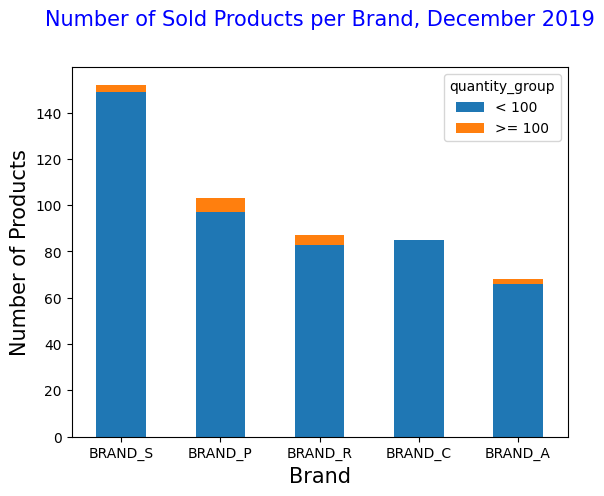

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price']*dataset['quantity']
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

#membuat dataframe baru, untuk agregat jumlah quantity terjual per product
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

#beri kolom baru untuk menandai product yang terjual >= 100 dan <100
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

#membuat referensi pengurutan brand berdasarkan banyaknya semua product
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

#plot stacked barchart
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Number of Sold Products per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Products',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

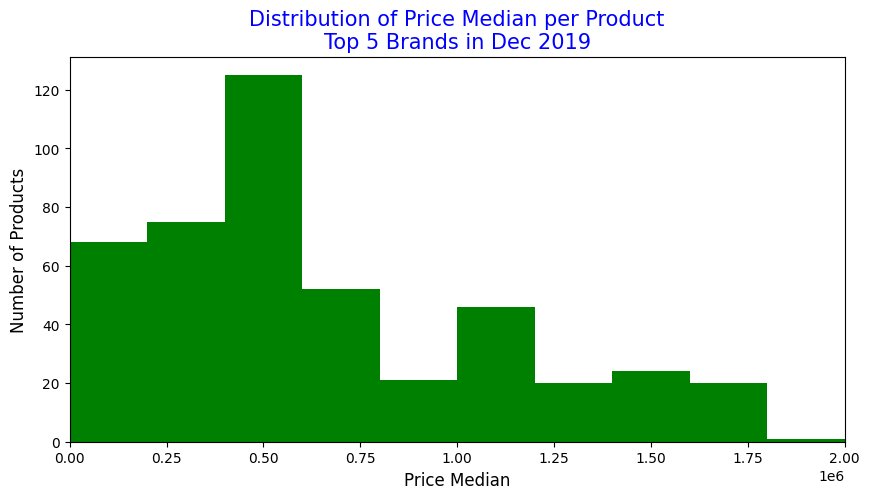

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Load dan preprocessing
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Top 5 brand berdasarkan quantity di Desember 2019
top_brands = (dataset[dataset['order_month'] == '2019-12']
              .groupby('brand')['quantity']
              .sum()
              .reset_index()
              .sort_values(by='quantity', ascending=False)
              .head(5))

# Filter data hanya untuk top 5 brand di Desember 2019
dataset_top5brand_dec = dataset[(dataset['order_month'] == '2019-12') &
                                (dataset['brand'].isin(top_brands['brand'].to_list()))]

# Plot histogram median harga produk
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(),
         bins=10, stacked=True, range=(1, 2000000), color='green')
plt.title('Distribution of Price Median per Product\nTop 5 Brands in Dec 2019', fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Number of Products', fontsize = 12)
plt.xlim(xmin=0, xmax=2000000)
plt.show()

Case 6a:

Untuk setiap product_id, cek scatterplot antara quantity dan GMV, apakah ada korelasi? Bagaimana dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

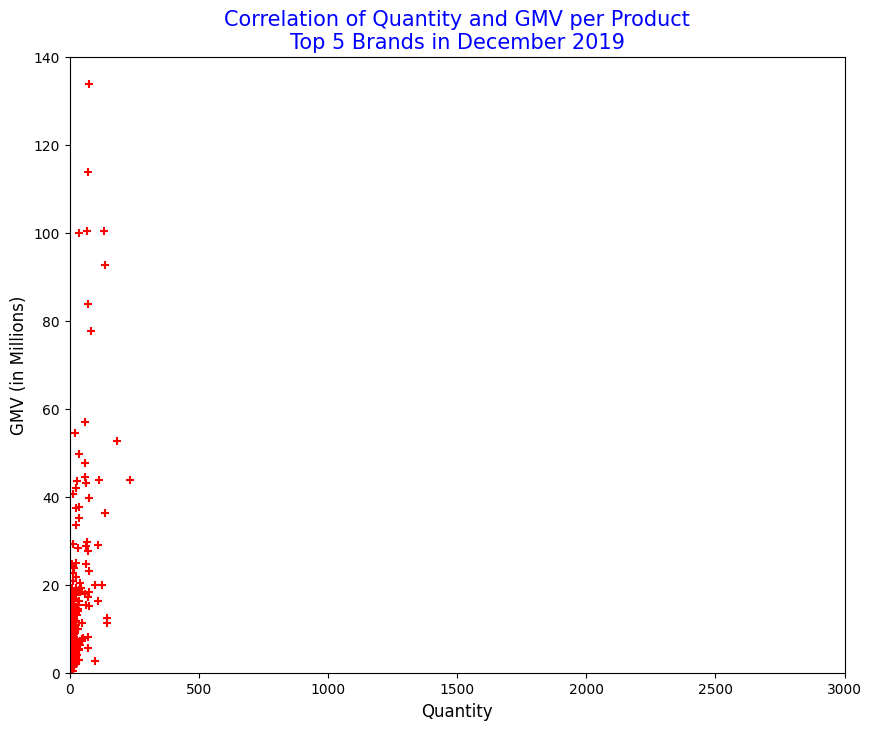

In [ ]:
# Agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id')\
    .agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()

# Scatter plot: Quantity vs GMV with red marker and better labels/ranges
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],
            data_per_product_top5brand_dec['gmv'],
            marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',
          fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('GMV (in Millions)', fontsize=12)
plt.xlim(xmin=0, xmax=3000)
plt.ylim(ymin=0, ymax=140000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))  # Display GMV in millions
plt.show()

Untuk setiap product_id, cek scatterplot antara quantity dan GMV sudah kamu lakukan pada Case 6a? Untuk Case 6b ini bagaimanakah dengan median harga vs quantity? Apakah product yang murah cenderung dibeli lebih banyak?

Jika berhasil dijalankan akan menghasilkan grafik seperti yang ditunjukkan di bawah ini:

<Figure size 640x480 with 0 Axes>

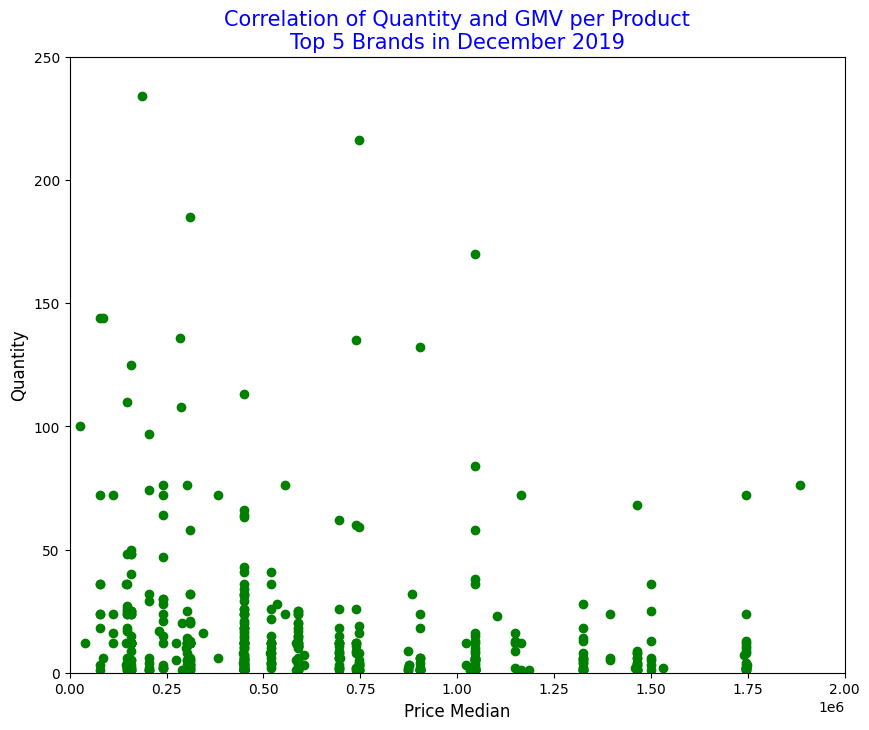

In [ ]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

top_brands = (dataset[dataset['order_month'] == '2019-12']
              .groupby('brand')['quantity']
              .sum()
              .reset_index()
              .sort_values(by='quantity', ascending=False)
              .head(5))

dataset_top5brand_dec = dataset[(dataset['order_month'] == '2019-12') &
                                (dataset['brand'].isin(top_brands['brand'].to_list()))]

plt.clf()

# Agregat per product
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id')\
    .agg({'quantity': 'sum', 'gmv': 'sum', 'item_price': 'median'}).reset_index()

# Scatter plot: Price Median vs Quantity
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],
            data_per_product_top5brand_dec['quantity'],
            marker='o', color='green')
plt.title('Correlation of Quantity and GMV per Product\nTop 5 Brands in December 2019',
          fontsize=15, color='blue')
plt.xlabel('Price Median', fontsize = 12)
plt.ylabel('Quantity', fontsize = 12)
plt.xlim(xmin=0, xmax=2000000)
plt.ylim(ymin=0, ymax=250)
plt.show()